# Identificacion de fronteras no linealres

In [66]:
from sklearn.datasets.samples_generator import make_circles, make_blobs
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

In [23]:
X, Y = make_circles(100, factor=.1, noise=.1)

In [63]:
def plt_svc(model, ax=None, plot_support= True):
    """Plot de la funcion de decision para una clasificacion en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrilla de puntos para evaluar el modelo.
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T #Tupla
    P = model.decision_function(xy).reshape(X.shape)
    
    ##Representamos las fronteras y los márgenes
    ax.contour(X, Y, P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    """
    if plot_support:
      ax.scatter(model.support_vertors_[:,0],
                 model.support_vectors_[:,1],
                s=300, linewidth=1, facecolors = "black")
    """    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

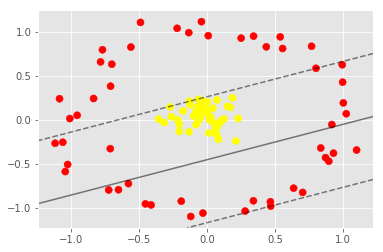

In [31]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [32]:
# Es imposible separar utilizando una recta.

In [33]:
r = np.exp(-(X**2).sum(1))

In [34]:
r

array([0.97988406, 0.90978192, 0.27108337, 0.32273922, 0.97365285,
       0.98094216, 0.30766434, 0.40256244, 0.35225702, 0.93295601,
       0.95472793, 0.9898338 , 0.34779015, 0.47206236, 0.98826825,
       0.29454021, 0.99833918, 0.35966115, 0.31352364, 0.98967865,
       0.29288933, 0.33664132, 0.35948258, 0.99832728, 0.41175678,
       0.36778384, 0.9079688 , 0.88129407, 0.94382448, 0.23941248,
       0.32291018, 0.90193592, 0.98938282, 0.32981373, 0.94854217,
       0.39640409, 0.99362707, 0.30773565, 0.36958551, 0.95211368,
       0.90488258, 0.52411346, 0.25227814, 0.95936587, 0.97843522,
       0.30898583, 0.98479171, 0.99135866, 0.30568713, 0.31357414,
       0.98748757, 0.26869199, 0.32578019, 0.99133725, 0.95704624,
       0.29307082, 0.23092458, 0.99285412, 0.38067452, 0.98849618,
       0.30535914, 0.36293751, 0.98468742, 0.94523888, 0.99028103,
       0.95514141, 0.40023953, 0.35383393, 0.99733637, 0.99918339,
       0.37425928, 0.98873896, 0.94492497, 0.37981054, 0.40869

In [35]:
from mpl_toolkits import mplot3d

In [54]:
def plot_3d(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [55]:
from ipywidgets import interact, fixed

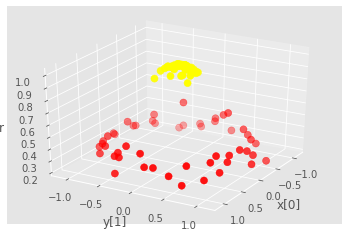

<function __main__.plot_3d>

In [60]:
interact(plot_3d, elev=[-90,-60,-30,0,30,60, 90], 
         azim = [-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X=fixed(X), Y=fixed(Y), r=fixed(r))

# Radial basic function
forma no lineal para definir la frontera de decisión entre cada una de las partes en las que dividimos el dataset.

In [61]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

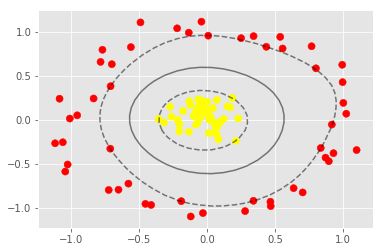

In [65]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="none")

## Ajuste de parámetrso SVM

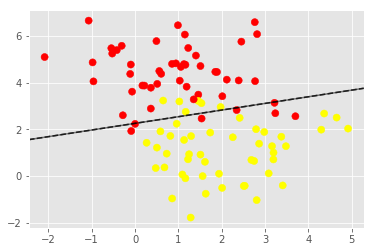

In [79]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=1E10)
model.fit(X,Y)
plt_svc(model)

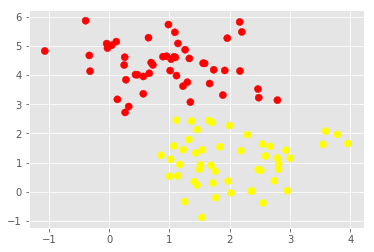

In [69]:
#importancia de cambiar el parametro C.
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

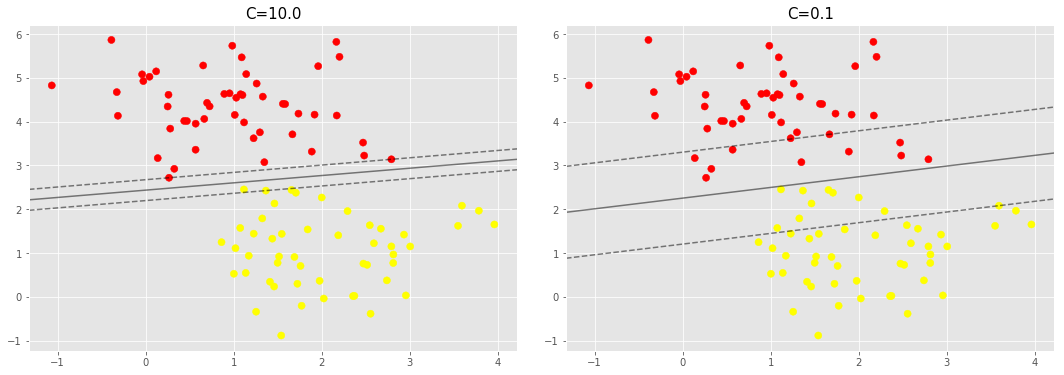

In [75]:
fig, ax=plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.06, right=0.95, wspace=0.1)

for ax_i, C in zip(ax,[10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C={0:.1f}".format(C), size=15)

In [76]:
#Diferencia entre el margen rígido o margen más laxo. volvemos al primer apartado de esta seccion y vemos como le cuesta mas decidir la 
#segmentacion.